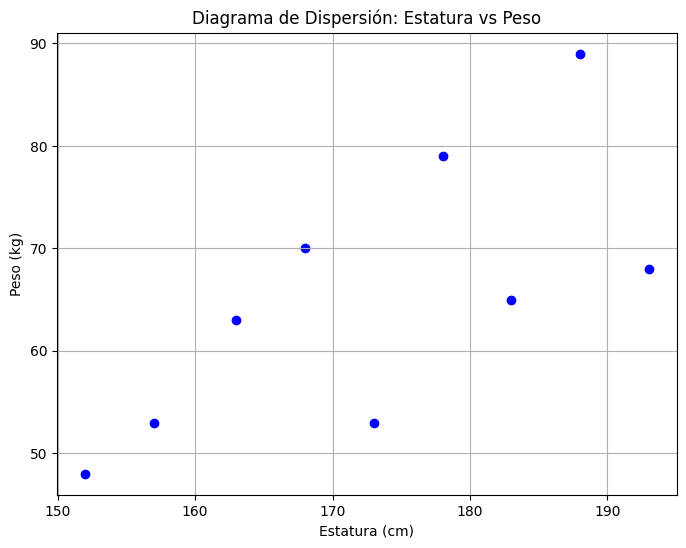

In [1]:
import numpy as np
import matplotlib.pyplot as plt
estatura = np.array([152, 157, 163, 168, 173, 178, 183, 188, 193])
peso = np.array([48, 53, 63, 70, 53, 79, 65, 89, 68])

# Graficar diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(estatura, peso, color='blue')
plt.title('Diagrama de Dispersión: Estatura vs Peso')
plt.xlabel('Estatura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la media de la estatura
media_estatura = sum(estatura) / len(estatura)

# Calcular la media del peso
media_peso = sum(peso) / len(peso)

print(f"Media de la estatura: {media_estatura:.2f} centímetros")
print(f"Media del peso: {media_peso:.2f} kilos")

Media de la estatura: 172.78 centímetros
Media del peso: 65.33 kilos


In [ ]:
#Cálculo de la media
# Calcular la media de la estatura utilizando la función mean de NumPy
media_estatura = np.mean(estatura)
print(media_estatura)

# Calcular la media del peso utilizando la función mean de NumPy
media_peso = np.mean(peso)
print(media_peso)

172.77777777777777
65.33333333333333


In [ ]:
# Calcular las medias de x y y
media_estatura = np.mean(estatura)
media_peso = np.mean(peso)

# Calcular las diferencias
dx = estatura - media_estatura
dy = peso - media_peso

# Calcular el numerador de la pendiente b
numerador = np.sum(dx * dy)

# Calcular el denominador de la pendiente b
denominador = np.sum(dx**2)

# Calcular la pendiente b
b = numerador / denominador

# Calcular la intersección a
a = media_peso - (b * media_estatura)

# Imprimir los resultados
print(f"Pendiente (b): {b:.3f}")
print(f"Intersección (a): {a:.3f}")


Pendiente (b): 0.658
Intersección (a): -48.419


In [ ]:
from sklearn.linear_model import LinearRegression

# Combinar los datos en un solo array
datos = np.column_stack((estatura, peso))

# Extraer las columnas de estatura y peso
estatura = datos[:, 0] #datos[:, 0]: Esto selecciona todas las filas (:) de la primera columna (índice 0)
# de la matriz datos, que representa la estatura de los datos.
peso = datos[:, 1] #datos[:, 1]: De manera similar, esto selecciona todas las filas de la segunda columna (índice 1) de la matriz datos, que representa el peso de los datos.

In [ ]:
datos

array([[152,  48],
       [157,  53],
       [163,  63],
       [168,  70],
       [173,  53],
       [178,  79],
       [183,  65],
       [188,  89],
       [193,  68]])

In [ ]:
estatura

array([152, 157, 163, 168, 173, 178, 183, 188, 193])

In [ ]:
peso

array([48, 53, 63, 70, 53, 79, 65, 89, 68])

In [ ]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(estatura.reshape(-1,1), peso)

# Obtener la pendiente (coeficiente) y la intersección (intercept) del modelo
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Imprimir los resultados
print("Coeficientes de la regresión lineal:")
print(f"Pendiente (b): {pendiente:.3f}")
print(f"Intercepto (a): {intercepto:.3f}")

Coeficientes de la regresión lineal:
Pendiente (b): 0.658
Intercepto (a): -48.419


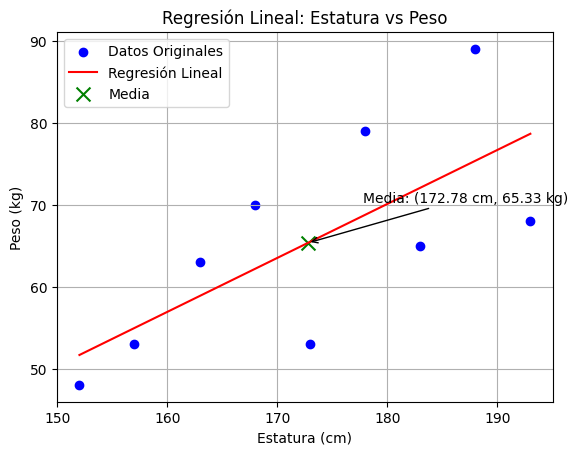

In [ ]:
# Graficar los puntos originales
plt.scatter(estatura, peso, color='blue', label='Datos Originales')

# Graficar la regresión lineal
plt.plot(estatura, modelo.predict(estatura.reshape(-1, 1)), color='red', label='Regresión Lineal')

# Marcar la coordenada de estatura media y peso medio
plt.scatter(media_estatura, media_peso, color='green', label='Media', marker='x', s=100)

# Etiquetas y leyenda
plt.xlabel('Estatura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Regresión Lineal: Estatura vs Peso')
plt.legend()
plt.grid(True)

# Anotar las coordenadas de media
plt.annotate(f'Media: ({media_estatura:.2f} cm, {media_peso:.2f} kg)', (media_estatura, media_peso), xytext=(media_estatura + 5, media_peso + 5), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Mostrar la gráfica
plt.show()

In [ ]:
# Calcular la media de estatura y peso
media_estatura = np.mean(estatura)
media_peso = np.mean(peso)

# Calcular el numerador de la correlación
numerador #<== este ya lo tenemos de cálculos anteriores numerador=np.sum(dx*dy)

# Calcular el denominador de la correlación
denominador = np.sqrt(np.sum(dx**2)) * np.sqrt(np.sum(dy**2))

# Calcular el coeficiente de correlación r
coef_correlacion = numerador / denominador

print(f"Coeficiente de correlación (r): {coef_correlacion:.3f}")

Coeficiente de correlación (r): 0.701


In [ ]:
# Calcular el coeficiente de correlación
coef_correlacion = np.corrcoef(estatura, peso)[0, 1]
print(f"Coeficiente de correlación (r): {coef_correlacion:.3f}")

Coeficiente de correlación (r): 0.701


In [ ]:
# Estatura proporcionada por el usuario
estatura_usuario = float(input("Ingrese una estatura para estimar el peso: "))

# Estimar el peso utilizando el modelo
peso_estimado = modelo.predict([[estatura_usuario]])

print(f"Estimación de peso para una estatura de {estatura_usuario} cm: {peso_estimado[0]:.2f} kg")

Ingrese una estatura para estimar el peso: 180
Estimación de peso para una estatura de 180.0 cm: 70.09 kg


In [ ]:
def predecir_pesos(estaturas):
    estaturas_array = np.array(estaturas).reshape(-1, 1)
    pesos_estimados = modelo.predict(estaturas_array)
    return pesos_estimados

# Ingresar estaturas por el usuario
estaturas_usuario = [int(x) for x in input("Ingrese las estaturas separadas por coma: ").split(',')]
pesos_estimados = predecir_pesos(estaturas_usuario)

# Imprimir resultados
for i, estatura_m in enumerate(estaturas_usuario):
    print(f"Estimación de peso para una estatura de {estatura_m} cm: {pesos_estimados[i]:.2f} kg")

Ingrese las estaturas separadas por coma: 180, 176, 158
Estimación de peso para una estatura de 180 cm: 70.09 kg
Estimación de peso para una estatura de 176 cm: 67.45 kg
Estimación de peso para una estatura de 158 cm: 55.60 kg


In [ ]:
import numpy as np
import statsmodels.api as sm

# Agregar una columna de unos para el término constante (intercepto)
X = sm.add_constant(estatura)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(peso, X).fit()

# Obtener los intervalos de confianza con tres decimales
intervalos_confianza = modelo.conf_int(alpha=0.05)  # Nivel de confianza del 95%

intervalos_confianza

array([[-1.52132517e+02,  5.52954125e+01],
       [ 5.98452476e-02,  1.25689683e+00]])

In [ ]:
# Imprimir los intervalos de confianza para el intercepto y la pendiente
print(f"Intervalo de confianza para el intercepto (a): {intervalos_confianza[0, 0]:.3f} - {intervalos_confianza[0, 1]:.3f}")
print(f"Intervalo de confianza para la pendiente (b): {intervalos_confianza[1, 0]:.3f} - {intervalos_confianza[1, 1]:.3f}")

Intervalo de confianza para el intercepto (a): -152.133 - 55.295
Intervalo de confianza para la pendiente (b): 0.060 - 1.257


In [ ]:
#Realiza la ecuación SIN intercepto
# Crear el modelo de regresión lineal sin intercepto
modelo_sin_intercepto = LinearRegression(fit_intercept=False)

# Ajustar el modelo a los datos
modelo_sin_intercepto.fit(estatura.reshape(-1,1), peso)

# Obtener la pendiente (coeficiente) del modelo
pendiente_sin_intercepto = modelo_sin_intercepto.coef_[0]

# Calcular el coeficiente de correlación
correlacion_sin_intercepto = np.corrcoef(estatura.ravel(), peso)[0, 1]

# Obtener los intervalos de confianza
modelo_con_intercepto = sm.OLS(peso, estatura).fit()

# Obtener los intervalos de confianza con tres decimales
intervalos_confianza_sin_intercepto = modelo_con_intercepto.conf_int(alpha=0.05, cols=None)  # Nivel de confianza del 95%


print(f"Coeficiente de correlación (r) sin intercepto: {correlacion_sin_intercepto:.3f}")
print(f"Pendiente (coeficiente) sin intercepto: {pendiente_sin_intercepto:.3f}")
print(f"Intervalos de confianza sin intercepto: {intervalos_confianza_sin_intercepto[0, 0]:.3f} - {intervalos_confianza_sin_intercepto[0, 1]:.3f}")

Coeficiente de correlación (r) sin intercepto: 0.701
Pendiente (coeficiente) sin intercepto: 0.380
Intervalos de confianza sin intercepto: 0.335 - 0.425


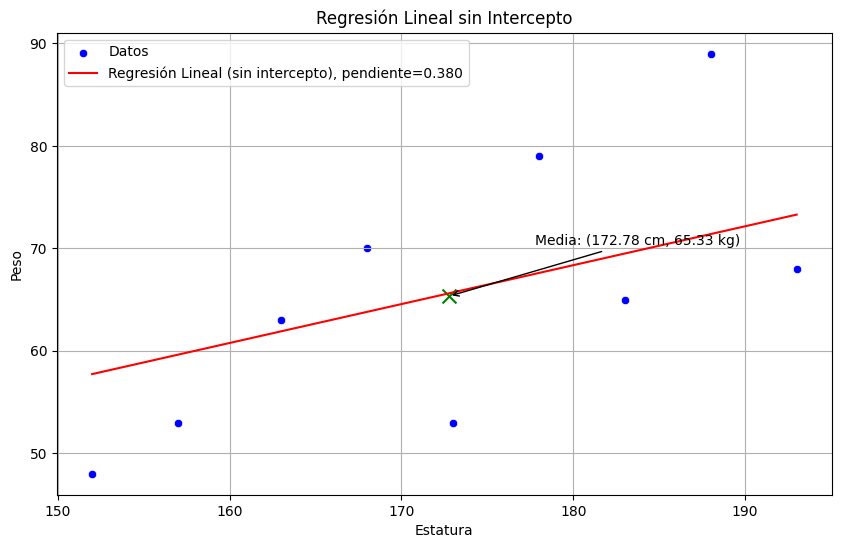

In [ ]:
import seaborn as sns

# Crear y ajustar el modelo de regresión lineal sin intercepto usando sklearn
modelo_sin_intercepto = LinearRegression(fit_intercept=False)
modelo_sin_intercepto.fit(estatura.reshape(-1,1), peso)

# Obtener la pendiente (coeficiente) del modelo sin intercepto
pendiente_sin_intercepto = modelo_sin_intercepto.coef_[0]

# Predicción de los valores de peso
predicciones = modelo_sin_intercepto.predict(estatura.reshape(-1,1))

# Graficar el diagrama de dispersión y la regresión lineal sin intercepto
plt.figure(figsize=(10, 6))

# Diagrama de dispersión
sns.scatterplot(x=estatura.ravel(), y=peso, label='Datos', color='blue')

# Regresión lineal sin intercepto
plt.plot(estatura, predicciones, label=f'Regresión Lineal (sin intercepto), pendiente={pendiente_sin_intercepto:.3f}', color='red')

plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Regresión Lineal sin Intercepto')
plt.legend()
plt.grid(True)

# Marcar la coordenada de estatura media y peso medio
plt.scatter(media_estatura, media_peso, color='green', label='Media', marker='x', s=100)

# Anotar las coordenadas de media
plt.annotate(f'Media: ({media_estatura:.2f} cm, {media_peso:.2f} kg)', (media_estatura, media_peso), xytext=(media_estatura + 5, media_peso + 5), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Mostrar la gráfica
plt.show()

In [ ]:
# Estimar el peso utilizando el modelo sin intercepto
# Estatura proporcionada por el usuario
estatura_usuario_sin = float(input("Ingrese una estatura para estimar el peso: "))

# Estimar el peso utilizando el modelo
peso_estimado_sin = modelo_sin_intercepto.predict([[estatura_usuario_sin]])

print(f"Estimación de peso para una estatura de {estatura_usuario_sin} cm: {peso_estimado_sin[0]:.2f} kg")

Ingrese una estatura para estimar el peso: 180
Estimación de peso para una estatura de 180.0 cm: 68.36 kg


In [ ]:
####2do EJEMPLO####

import numpy as np
import pandas as pd

# Configuración de la semilla aleatoria para reproducibilidad
np.random.seed(1234)

# Generar datos aleatorios para las variables independientes
independiente1 = np.random.randint(50, 100, 50)
independiente2 = np.random.randint(1, 10, 50)
independiente3 = np.random.normal(5, 2, 50)

# Generar datos para la variable dependiente usando una combinación lineal de las variables independientes
dependiente = 2 * independiente1 + 3 * independiente2 - 4 * independiente3 + np.random.normal(0, 10, 50)

#La función np.random.normal(0, 10, 50) se utiliza para generar una muestra de números aleatorios distribuidos normalmente, es decir,
#una distribución gaussiana con una media de 0 y una desviación estándar de 10, y en este caso, se generan 50 números aleatorios en total.

# Crear el DataFrame
data = pd.DataFrame({
    'Independiente1': independiente1,
    'Independiente2': independiente2,
    'Independiente3': independiente3,
    'Dependiente': dependiente
})

# Mostrar las primeras filas del DataFrame
print(data.head())

   Independiente1  Independiente2  Independiente3  Dependiente
0              97               5        5.315243   175.407855
1              69               1        4.412890   137.814233
2              88               6        5.223120   157.730249
3              62               2        6.195357    94.405632
4              74               6        2.459814   164.541752


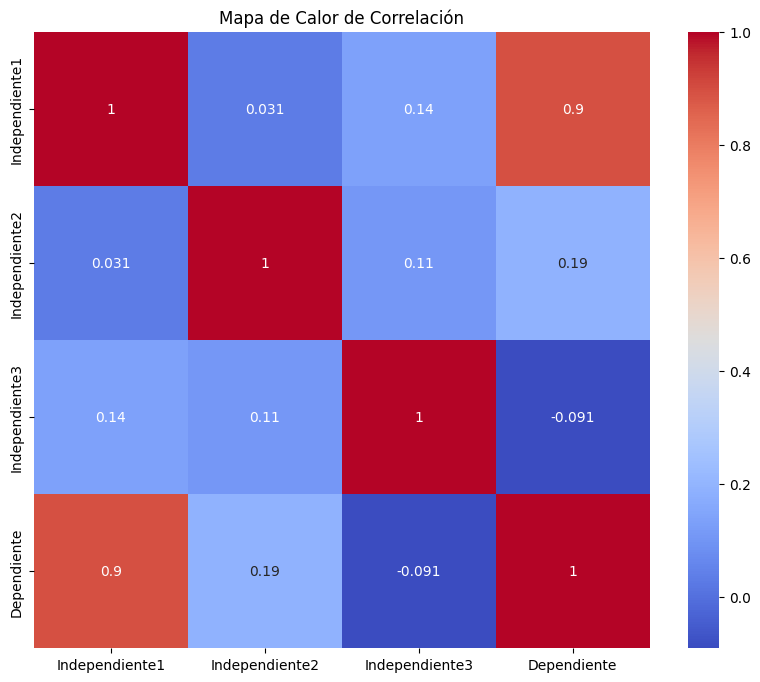

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = data.corr()

# Graficar el diagrama de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el dataset en variables independientes (X) y variable dependiente (y)
X = data[['Independiente1', 'Independiente2', 'Independiente3']]
y = data['Dependiente']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba (75% y 25% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y ajustar el modelo de regresión lineal utilizando el conjunto de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

Coeficiente de determinación (R^2): 0.86


La función sm.OLS(y, X).fit() se utiliza para ajustar un modelo de regresión lineal utilizando el método de Mínimos Cuadrados Ordinarios (OLS, por sus siglas en inglés) utilizando la librería statsmodels.

Aquí está el desglose de esta función:

**sm**: es la abreviatura de statsmodels, la cual es una librería en Python utilizada para realizar análisis estadísticos y modelado.

**OLS**: es el método que se utiliza para ajustar un modelo de regresión lineal. OLS se refiere a Mínimos Cuadrados Ordinarios (Ordinary Least Squares Regression), que es un método estadístico para estimar los parámetros de una regresión lineal al minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

**y**: es la variable dependiente del modelo de regresión lineal. Debe ser un objeto Series o array de una dimensión que contenga las observaciones de la variable dependiente.

**X**: es la matriz de variables independientes del modelo de regresión lineal. Debe ser un objeto DataFrame o array bidimensional que contenga las observaciones de las variables independientes.

**.fit()**: es el método que se utiliza para ajustar el modelo de regresión lineal a los datos. Devuelve un objeto RegressionResults que contiene información detallada sobre el modelo ajustado, como coeficientes, p-values, intervalos de confianza, estadísticas de ajuste (como R-cuadrado, F-statistic, etc.), entre otros.


Entonces, modelo = sm.OLS(y, X).fit() crea un modelo de regresión lineal utilizando el método de Mínimos Cuadrados Ordinarios y ajusta este modelo a los datos X e y, devolviendo un objeto RegressionResults que contiene toda la información relevante sobre el modelo ajustado. Este objeto modelo se puede utilizar posteriormente para obtener información específica sobre el ajuste del modelo, como los coeficientes, los p-values, los intervalos de confianza, etc., que es un método estadístico para estimar los parámetros de una regresión lineal al minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

In [ ]:
# Añadir constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal utilizando statsmodels
modelo = sm.OLS(y, X).fit()

# Obtener los coeficientes, p-values (nivel de significancia) y los intervalos de confianza
coeficientes = modelo.params
p_values = modelo.pvalues
intervalos_confianza = modelo.conf_int()

# Imprimir los resultados
print("Coeficientes:")
print(coeficientes)
print("\nNivel de significancia (p-values):")
print(p_values)
print("\nIntervalos de confianza:")
print(intervalos_confianza)

Coeficientes:
const            -3.275961
Independiente1    2.045527
Independiente2    2.706890
Independiente3   -4.072575
dtype: float64

Nivel de significancia (p-values):
const             7.364254e-01
Independiente1    1.106706e-22
Independiente2    4.088827e-04
Independiente3    2.513563e-05
dtype: float64

Intervalos de confianza:
                        0          1
const          -22.748725  16.196804
Independiente1   1.819710   2.271343
Independiente2   1.277317   4.136463
Independiente3  -5.822557  -2.322592


In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


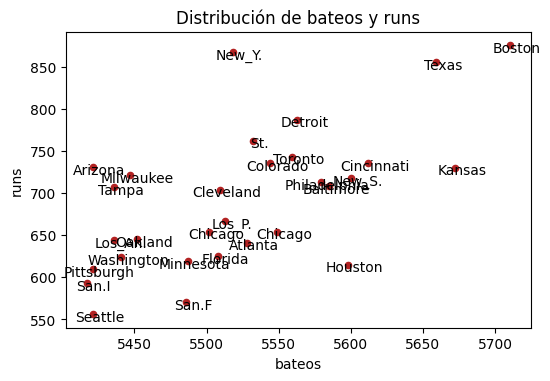

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax,
)
ax.set_title('Distribución de bateos y runs');

# Añadir el nombre de los equipos
for i, row in datos.iterrows():
    ax.annotate(row['equipos'], (row['bateos'], row['runs']), textcoords="offset points", xytext=(5,-5), ha='center')


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Predicción en la base Test
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]


In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Fri, 24 May 2024   Prob (F-statistic):            0.00906
Time:                        13:51:02   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

.predict(): devuelve únicamente el valor de las predicciones.

.get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


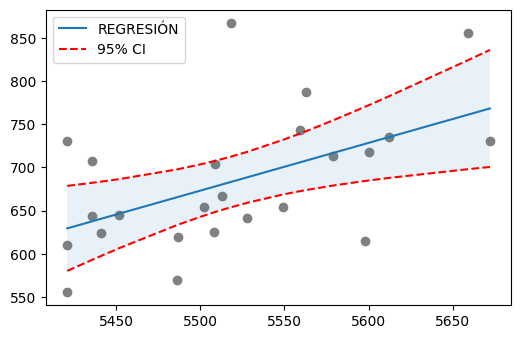

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="REGRESIÓN")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();